<a href="https://colab.research.google.com/github/girii-16/Enhancing-road-safety-with-AI-driven-traffic-accident-analysis-and-prediction/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Preprocessing for AI-Driven Traffic Accident Analysis
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("ai_traffic_accident_analysis.csv")

# Display initial info
print("Initial shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# Drop irrelevant columns
df.drop(columns=["Accident_ID"], inplace=True)

# Convert Driver_Age to numeric
df["Driver_Age"] = pd.to_numeric(df["Driver_Age"], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
categorical_columns = [
    "Location", "Weather_Condition", "Road_Condition",
    "Light_Condition", "Vehicle_Type", "Driver_Gender", "Accident_Severity"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for decoding if needed

# Optional: Convert Date_Time to datetime and extract hour
df["Date_Time"] = pd.to_datetime(df["Date_Time"])
df["Hour"] = df["Date_Time"].dt.hour
df["Is_Night"] = df["Hour"].apply(lambda x: 1 if (x < 6 or x > 18) else 0)

# Drop the original Date_Time column
df.drop(columns=["Date_Time"], inplace=True)

# Final output
print("Preprocessed data shape:", df.shape)
print("Sample rows:\n", df.head())


Initial shape: (100, 13)
Missing values:
 Accident_ID                0
Date_Time                  0
Location                   0
Weather_Condition          0
Road_Condition             0
Light_Condition            0
Vehicle_Type               0
Driver_Age                 0
Driver_Gender              0
Accident_Severity          0
Casualties                 0
Speed_Limit                0
AI_Predicted_Risk_Score    0
dtype: int64
Preprocessed data shape: (100, 13)
Sample rows:
    Location  Weather_Condition  Road_Condition  Light_Condition  Vehicle_Type  \
0         3                  4               2                2             4   
1         3                  2               0                1             3   
2         2                  1               2                2             3   
3         2                  2               1                2             5   
4         1                  2               3                2             2   

   Driver_Age  Driver_Gender  Ac

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = df.drop(['Accident_Severity'], axis=1)
y = df['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:08:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

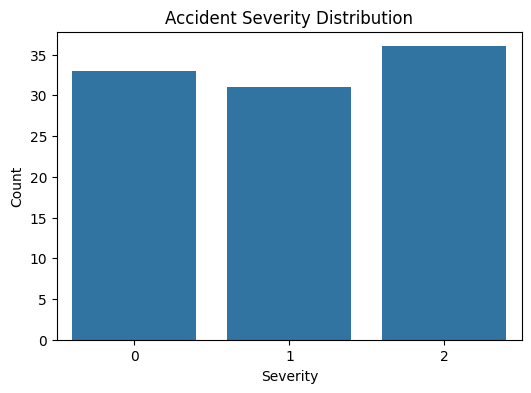

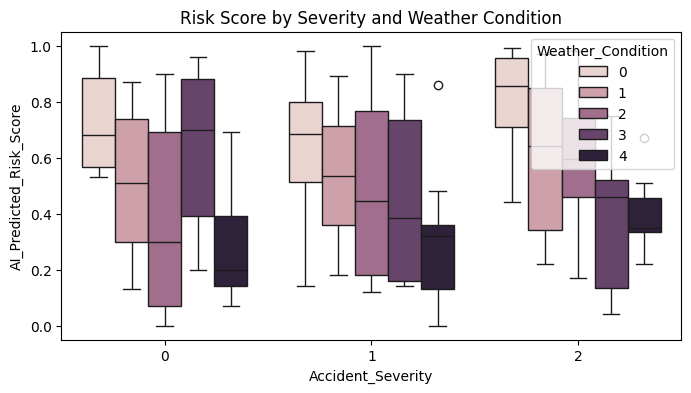

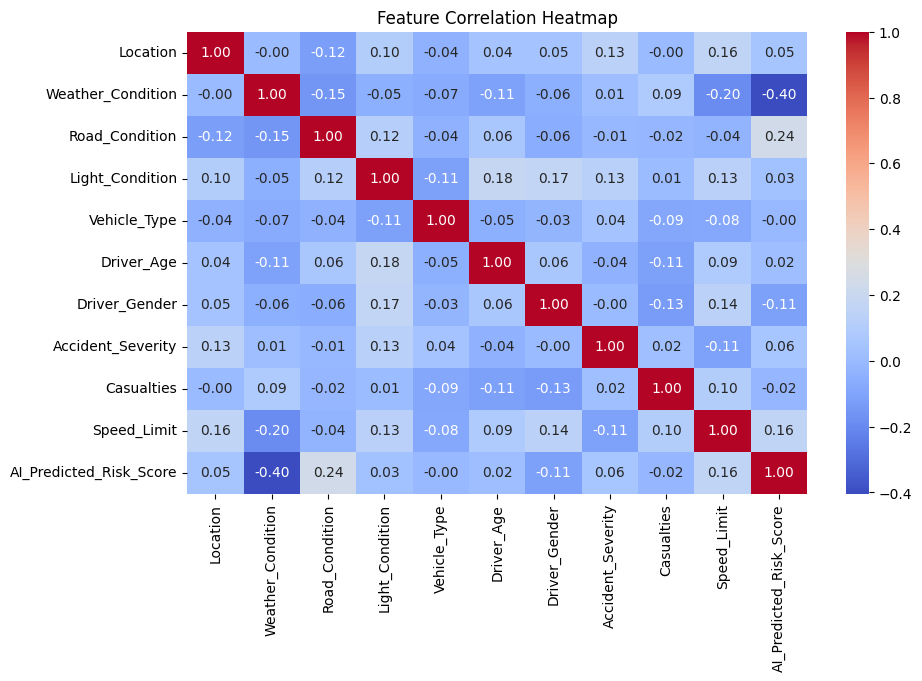

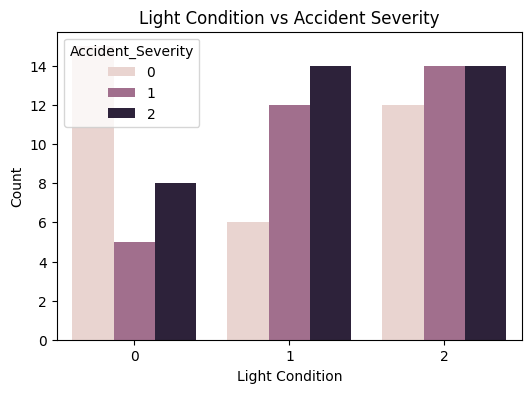

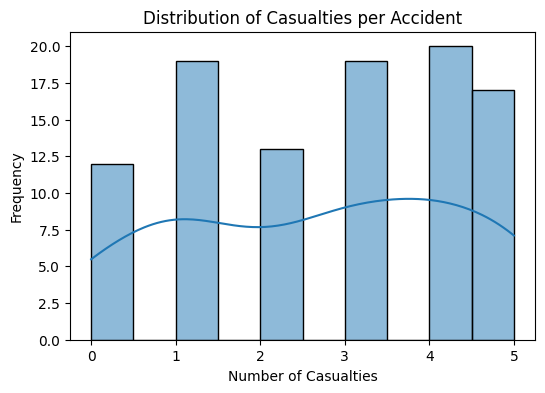

In [ ]:
# EDA for AI-Driven Traffic Accident Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ai_traffic_accident_analysis.csv")

# Drop irrelevant or redundant columns
df.drop(columns=["Accident_ID", "Date_Time"], inplace=True)

# Convert driver age to numeric and drop rows with missing values
df["Driver_Age"] = pd.to_numeric(df["Driver_Age"], errors='coerce')
df.dropna(inplace=True)

# Encode categorical variables for plotting purposes
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Location', 'Weather_Condition', 'Road_Condition',
            'Light_Condition', 'Vehicle_Type', 'Driver_Gender', 'Accident_Severity']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# ------- Visualizations --------

# 1. Accident Severity Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Accident_Severity", data=df)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

# 2. Severity vs Weather
plt.figure(figsize=(8, 4))
sns.boxplot(x="Accident_Severity", y="AI_Predicted_Risk_Score", hue="Weather_Condition", data=df)
plt.title("Risk Score by Severity and Weather Condition")
plt.show()

# 3. Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Light Condition vs Severity
plt.figure(figsize=(6, 4))
sns.countplot(x="Light_Condition", hue="Accident_Severity", data=df)
plt.title("Light Condition vs Accident Severity")
plt.xlabel("Light Condition")
plt.ylabel("Count")
plt.show()

# 5. Casualties Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["Casualties"], bins=10, kde=True)
plt.title("Distribution of Casualties per Accident")
plt.xlabel("Number of Casualties")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



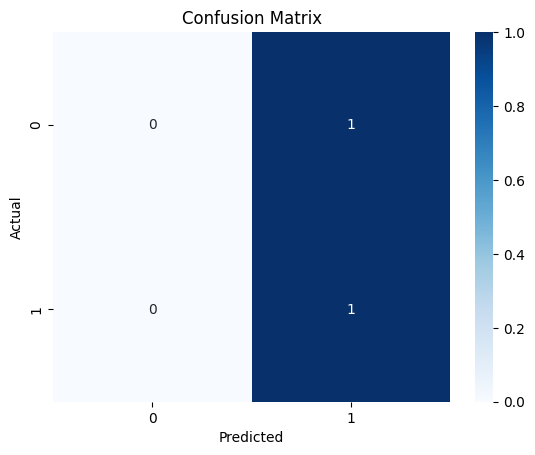

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
